<a href="https://colab.research.google.com/github/MargarytaKyian/AiLabCollegeKyian/blob/main/LabAI3_4Kyian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scores with threshold = 0.5
Accuracy RF: 0.671
Recall RF: 0.641
Precision RF: 0.681
F1 RF: 0.660
------------------------------
Scores with threshold = 0.25
Accuracy RF: 0.502
Recall RF: 1.000
Precision RF: 0.501
F1 RF: 0.668



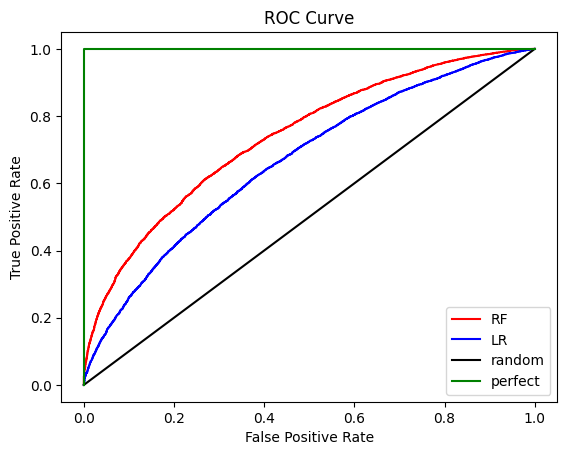


AUC RF: 0.738
AUC LR: 0.666



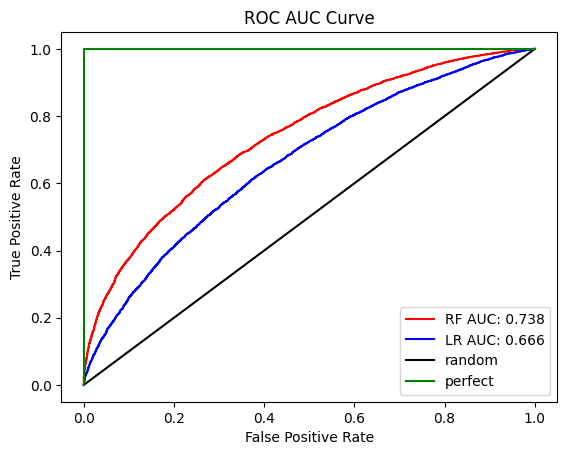

In [73]:
# Лаб.№3-4 ШІ. Киян М. ІПЗ-407
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score)

# Завантаження даних з CSV файлу
df = pd.read_csv('/content/data_metrics.csv')

# Встановлення порогу для бінаризації прогнозів
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= thresh).astype('int')
df['predicted_LR'] = (df.model_LR >= thresh).astype('int')
df.head()

# Функції для обчислення значень TP, FN, FP, TN
def kyian_find_TP(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 1))
def kyian_find_FN(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 0))
def kyian_find_FP(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 1))
def kyian_find_TN(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 0))

# Функція для обчислення значень TP, FN, FP, TN
def kyian_find_conf_matrix_values(y_true, y_pred):
    TP = kyian_find_TP(y_true, y_pred)
    FN = kyian_find_FN(y_true, y_pred)
    FP = kyian_find_FP(y_true, y_pred)
    TN = kyian_find_TN(y_true, y_pred)
    return TP, FN, FP, TN

# Функція для побудови матриці плутанини
def kyian_confusion_matrix(y_true, y_pred):
    TP, FN, FP, TN = kyian_find_conf_matrix_values(y_true, y_pred)
    return np.array(([TN, FP], [FN, TP]))

# Перевірка коректності функцій побудови матриці плутанини
assert np.array_equal(kyian_confusion_matrix(df.actual_label.values, df.predicted_RF.values),
                      confusion_matrix(df.actual_label.values, df.predicted_RF.values)), 'kyian_confusion_matrix() is not correct for RF'
assert np.array_equal(kyian_confusion_matrix(df.actual_label.values, df.predicted_LR.values),
                      confusion_matrix(df.actual_label.values, df.predicted_LR.values)), 'kyian_confusion_matrix() is not correct for LR'

# Функція для обчислення якості
def kyian_accuracy_score(y_true, y_pred):
    TP, FN, FP, TN = kyian_find_conf_matrix_values(y_true, y_pred)
    return (TP + TN) / (TP + FN + FP + TN)

# Перевірка коректності функцій обчислення якості
assert kyian_accuracy_score(df.actual_label.values, df.predicted_RF.values) == accuracy_score(df.actual_label.values, df.predicted_RF.values), 'kyian_accuracy_score failed on RF'
assert kyian_accuracy_score(df.actual_label.values, df.predicted_LR.values) == accuracy_score(df.actual_label.values, df.predicted_LR.values), 'kyian_accuracy_score failed on LR'

# Функція для обчислення повноти
def kyian_recall_score(y_true, y_pred):
    TP, FN, FP, TN = kyian_find_conf_matrix_values(y_true, y_pred)
    return TP / (TP + FN)

# Перевірка коректності функцій обчислення повноти
assert kyian_recall_score(df.actual_label.values, df.predicted_RF.values) == recall_score(df.actual_label.values, df.predicted_RF.values), 'kyian_recall_score failed on RF'
assert kyian_recall_score(df.actual_label.values, df.predicted_LR.values) == recall_score(df.actual_label.values, df.predicted_LR.values), 'kyian_recall_score failed on LR'

# Функція для обчислення точності
def kyian_precision_score(y_true, y_pred):
    TP, FN, FP, TN = kyian_find_conf_matrix_values(y_true, y_pred)
    return TP / (TP + FP) if (TP + FP) > 0 else 0  # Додано обробку ділення на нуль

# Перевірка коректності функцій обчислення точності
assert kyian_precision_score(df.actual_label.values, df.predicted_RF.values) == precision_score(df.actual_label.values, df.predicted_RF.values), 'kyian_precision_score failed on RF'
assert kyian_precision_score(df.actual_label.values, df.predicted_LR.values) == precision_score(df.actual_label.values, df.predicted_LR.values), 'kyian_precision_score failed on LR'

# Функція для обчислення F1-оцінки
def kyian_f1_score(y_true, y_pred):
    recall = kyian_recall_score(y_true, y_pred)
    precision = kyian_precision_score(y_true, y_pred)

    # Обробка випадків, коли precision або recall дорівнюють нулю
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

# Перевірка коректності функцій обчислення F1-оцінки
assert kyian_f1_score(df.actual_label.values, df.predicted_RF.values) == f1_score(df.actual_label.values, df.predicted_RF.values), 'kyian_f1_score failed on RF'
assert np.isclose(kyian_f1_score(df.actual_label.values, df.predicted_LR.values), f1_score(df.actual_label.values, df.predicted_LR.values)), 'kyian_f1_score failed on LR'

# Вивід показників для порогу 0.5
print('Scores with threshold = 0.5')
print('Accuracy RF: %.3f' % kyian_accuracy_score(df.actual_label.values, df.predicted_RF.values))
print('Recall RF: %.3f' % kyian_recall_score(df.actual_label.values, df.predicted_RF.values))
print('Precision RF: %.3f' % kyian_precision_score(df.actual_label.values, df.predicted_RF.values))
print('F1 RF: %.3f' % kyian_f1_score(df.actual_label.values, df.predicted_RF.values))
print('-' * 30)  # Розділова риска

# Вивід показників для порогу 0.25
print('Scores with threshold = 0.25')
print('Accuracy RF: %.3f' % kyian_accuracy_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values))
print('Recall RF: %.3f' % kyian_recall_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values))
print('Precision RF: %.3f' % kyian_precision_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values))
print('F1 RF: %.3f\n' % kyian_f1_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values))

# Обчислення ROC-кривих
fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

# Візуалізація ROC-кривої
plt.plot(fpr_RF, tpr_RF, 'r-', label='RF')
plt.plot(fpr_LR, tpr_LR, 'b-', label='LR')
plt.plot([0, 1], [0, 1], 'k-', label='random')  # Випадковий прогноз
plt.plot([0, 0, 1, 1], [0, 1, 1, 1], 'g-', label='perfect')  # Ідеальна модель
plt.xlabel('False Positive Rate')  # Підпис осі X
plt.ylabel('True Positive Rate')  # Підпис осі Y
plt.legend()
plt.title('ROC Curve')  # Заголовок графіка
plt.show()

# Обчислення ROC AUC
auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)
print('\nAUC RF: %.3f' % auc_RF)
print('AUC LR: %.3f\n' % auc_LR)

# Візуалізація ROC AUC-кривої
plt.plot(fpr_RF, tpr_RF, 'r-', label='RF AUC: %.3f' % auc_RF)
plt.plot(fpr_LR, tpr_LR, 'b-', label='LR AUC: %.3f' % auc_LR)
plt.plot([0, 1], [0, 1], 'k-', label='random')  # Випадковий прогноз
plt.plot([0, 0, 1, 1], [0, 1, 1, 1], 'g-', label='perfect')  # Ідеальна модель
plt.xlabel('False Positive Rate')  # Підпис осі X
plt.ylabel('True Positive Rate')  # Підпис осі Y
plt.legend()
plt.title('ROC AUC Curve')  # Заголовок графіка
plt.show()